---
title: "Analyse des résultats (PoC V1)"
format: html
---


In [1]:
# Getting started

# A simple notebooks for testing some analyses on the first version of the questionnaire.
# Data are not pushed to github due to privacy reasons. 
# The raw_data.csv should be copied to the data/ folder. 

# Let's first load the data to understand its structure and then compute general statistical information.
import pandas as pd

# Load the data
file_path = '../data/Analyse réponses.xlsx - Treated data.csv'

# ne pas lire la première ligne
data = pd.read_csv(file_path, skiprows=1)

# Display the first few rows of the dataframe to understand its structure
data.head(2)


/var/folders/s4/6jbnvfsj1v10f2txtlkndj5w0000gp/T/ipykernel_38954/2759663841.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,TITRE,ANNEE,PAYS,CANAL,TYPE,SAISON,LIEU(X) DE L'ACTION,EPOQUE DU RECIT,TRAITEMENT DU RECIT,TYPE DE MONDE,...,Epoque,Traitement,Monde,Genre,Conso,Vie,Vivant,Climat,Recul,Nécessité
0,Une nuit,2023.0,France,SALLE DE CINÉMA,FILM,NaN,"France, Paris",2020-2030,Ni dystopique ni utopique,Réaliste (monde proche du nôtre dans son fonct...,...,2020-2030,Ni dystopique ni utopique,Réaliste (monde proche du nôtre dans son fonct...,Comédie-romantique,-1.0,0.0,0.0,0.0,"Non applicable, les scores obtenus sont neutre...","Non applicable, les scores obtenus sont neutre..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-2030,Ni dystopique ni utopique,Réaliste (monde proche du nôtre dans son fonct...,Comédie-romantique,-1.0,0.0,0.0,0.0,"Non applicable, les scores obtenus sont neutre...","Non applicable, les scores obtenus sont neutre..."


In [2]:
# colonnes
print(list(data.columns))

['TITRE', 'ANNEE', 'PAYS', 'CANAL', 'TYPE', 'SAISON', "LIEU(X) DE L'ACTION", 'EPOQUE DU RECIT', 'TRAITEMENT DU RECIT', 'TYPE DE MONDE', 'GENRE', 'POSITION DANS LE RECIT', 'GENRE.1', 'AGE', 'ETHNICITÉ', 'BEAUTE', 'POIDS', 'PAYS DE RESIDENCE', "TYPE D'HABITAT", "LIEU D'HABITAT", 'Appartement', 'Colocation', 'Maison', 'Studio', 'Hôtel', 'Ferme', 'Alternatif / Communautaire', 'Ne sait pas / Autre', 'ACTIVITE', "SECTEUR D'ACTIVITE", 'CATEGORIE SOCIALE', 'ASPIRATIONS', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'VALEURS / TRAITS DE CARACTÈRE', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unn

In [3]:
# Supprimer les lignes où la première colonne contient "Contenu XXX"
# XXX est un nombre
# Et Supprimer les lignes où toutes les valeurs sont NaN
df  = data[~data['TITRE'].str.contains(r'Contenu \d+', na=False)].dropna(how='all')
print('nb lignes et nb colonnes')
df.shape

nb lignes et nb colonnes


(812, 104)

In [4]:
# ne conserver qu'une ligne sur 4  (ce qui revient à supprimer les informations des personnages 2, 3, 4 quand ils existent)
df_truncated = df.iloc[::4]

# Pour afficher séparément le nombre de lignes et de colonnes
nb_lignes, nb_colonnes = df_truncated.shape
print(f"Nombre de réponses analysées : {nb_lignes}")
print(f"Nombre de colonnes dans l'analyse : {nb_colonnes}")


Nombre de réponses analysées : 203
Nombre de colonnes dans l'analyse : 104


In [5]:
# Nettoyage du data set

# mettre les titres en majuscule 
df_truncated['TITRE'] = df_truncated['TITRE'].str.upper()

### Convertir les types de données correctement ici 
# Convertir les années en entier
annee = "ANNEE"
df_truncated[annee] = pd.to_numeric(df_truncated[annee], errors='coerce').fillna(0).astype(int)

# print(df_truncated.dtypes)  # Afficher les types de données des colonnes pour vérifier


/var/folders/s4/6jbnvfsj1v10f2txtlkndj5w0000gp/T/ipykernel_38954/3001236423.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_truncated['TITRE'] = df_truncated['TITRE'].str.upper()
/var/folders/s4/6jbnvfsj1v10f2txtlkndj5w0000gp/T/ipykernel_38954/3001236423.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_truncated[annee] = pd.to_numeric(df_truncated[annee], errors='coerce').fillna(0).astype(int)


In [14]:
# Trouver les titres qui apparaissent plus de 4 fois dans la colonne "TITRE" (car chaque titre a 4 lignes, une pour chaque personnage)
titles_more_than_once = df_truncated['TITRE'].value_counts()
titles_more_than_once = titles_more_than_once[titles_more_than_once > 1]

titles_more_than_once


TITRE
POLAR PARK                   6
LE RÈGNE ANIMAL              4
UNE ANNÉE DIFFICILE          3
SAMBRE                       3
VOLEUSES                     2
SECOND TOUR                  2
THE CROWN                    2
PAST LIVES                   2
BODIES                       2
LE LIVRE DES SOLUTIONS       2
À PLEIN TEMPS                2
REVOIR PARIS                 2
D'ARGENT ET DE SANG          2
YANNICK                      2
SENSE8                       2
ANATOMIE D'UNE CHUTE         2
LE THÉORÈME DE MARGUERITE    2
Name: count, dtype: int64

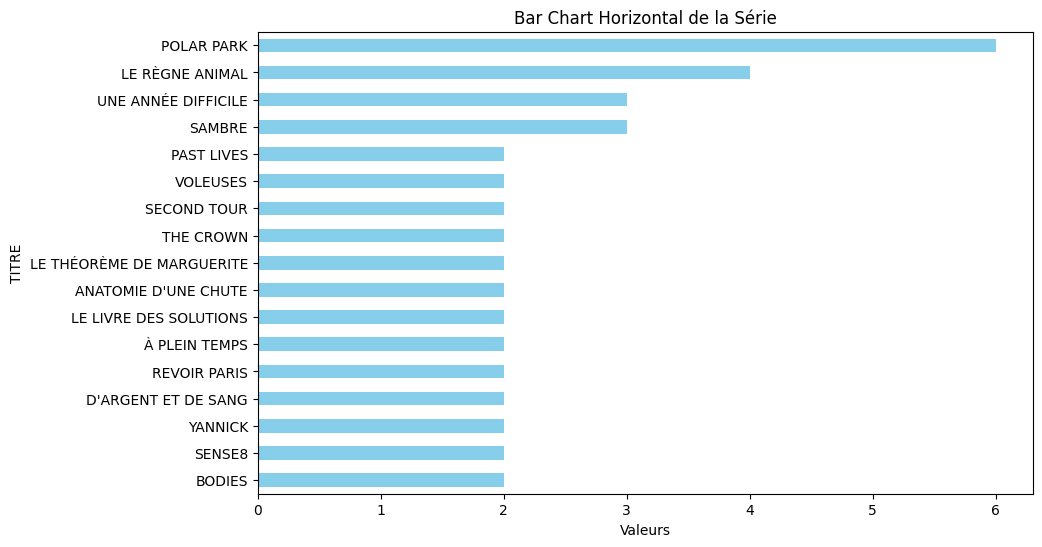

In [44]:
import matplotlib.pyplot as plt

# Afficher un bar chart des titres les plus fréquents
# Affichage d'un bar chart horizontal
plt.figure(figsize=(10, 6))
titles_more_than_once.sort_values(ascending=True).plot(kind='barh', color='skyblue',)
plt.xlabel('Nb')
plt.title('Fréquence des films/séries')
plt.show()

In [7]:


# Extract unique values from the "ANNEE" column to understand its format
unique_years = df_truncated[annee].unique()

# Display a few unique values for inspection
unique_years[:100]



array([2023, 2016, 2022, 1997, 2015, 2006, 2018, 2021, 1984, 1968, 2020,
       2019, 1971, 2017, 2001, 2012, 1987, 2005, 1975, 1982, 2013, 2014,
       2010, 1994, 2009, 1988, 2000, 2011, 1999, 1957, 2002])

In [8]:
def visualize_year_distribution(years_data, chart_title):
    """
    Visualise la distribution des années, y compris les intervalles, dans un ensemble de données d'années.
    
    Parameters:
    - years_data (list or pd.Series): Un tableau ou une série Pandas contenant des années ou des intervalles d'années.
    
    Returns:
    - Affiche un histogramme de la distribution des années.
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import re  # For regular expression operations
    
    
    # Convertir toutes les valeurs en chaînes pour gérer les intervalles potentiels comme des entrées uniques
    years_data = years_data.astype(str)
    
    # Séparer les intervalles en années individuelles et compter la fréquence de chaque année
    all_years = []
    # Utilise un set pour les valeurs non numériques
    non_numeric_entries = set()
    
    for year in years_data:
        if re.search(r'[a-z]', year):  # If there are no digits in the string
            non_numeric_entries.add(year)
        elif "," in year:
            years_list = year.split(",")
            for y in years_list:
                all_years.append(int(y.strip()))  # Ajouter chaque année en la convertissant en entier
        elif "+/-" in year:  # Vérifier si c'est un intervalle
            start_year, uncertainty = year.split("+/-")
            if (start_year != ''):
                 all_years.extend(range(int(start_year), int(start_year) + uncertainty + 1))
                 print(year)
            else:
                non_numeric_entries.add(year)
        elif "-" in year:  # Vérifier si c'est un intervalle
            start_year, end_year = year.split("-")
            all_years.extend(range(int(start_year), int(end_year) + 1))
        elif  "/" in year:  # Vérifier si c'est un intervalle
            start_year, end_year = year.split("/")
            all_years.extend(range(int(start_year), int(end_year) + 1))
        else:
            all_years.append(int(year))
    
    # Print non-numeric entries if any
    if non_numeric_entries:
        print("Non-numeric entries found:", non_numeric_entries)
    
    # Proceed with visualization only if there are numeric years
    if all_years:
        # Créer un DataFrame à partir de la liste des années pour faciliter la visualisation
        df_years = pd.DataFrame(all_years, columns=["Year"])
        
        # Visualiser la distribution des années avec un histogramme
        plt.figure(figsize=(10, 6))
        df_years["Year"].hist(bins=len(df_years["Year"].unique()), color="skyblue", edgecolor="black")
        plt.title(chart_title)
        plt.xlabel("Année")
        plt.ylabel("Fréquence")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("No numeric years found for visualization.")
    return all_years





/var/folders/s4/6jbnvfsj1v10f2txtlkndj5w0000gp/T/ipykernel_38954/2978788642.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_truncated[annee] = df_truncated[annee].astype(str)


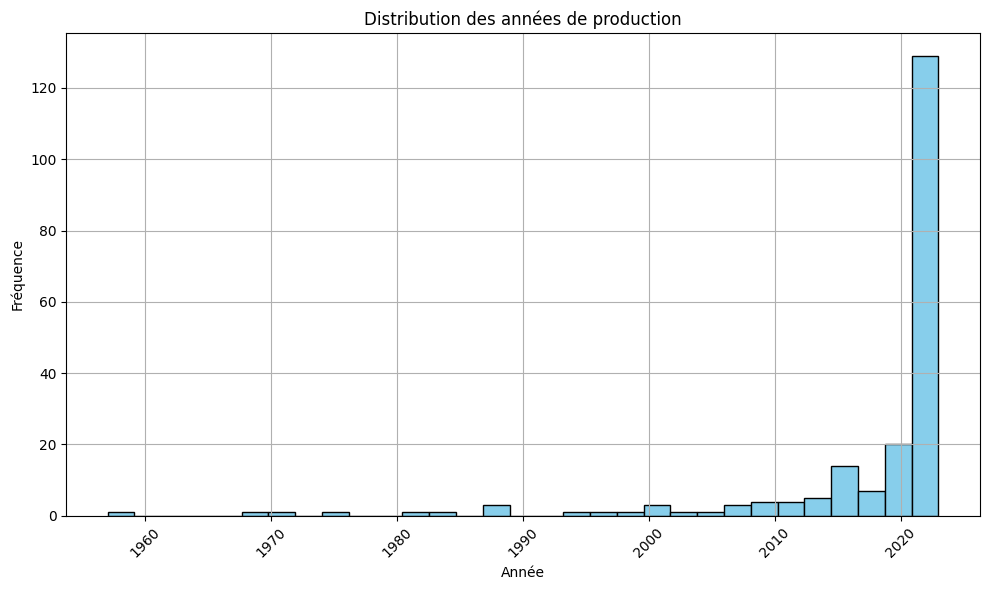

In [9]:
#import matplotlib.pyplot as plt

# Convertir toutes les valeurs en chaînes pour gérer les intervalles potentiels comme des entrées uniques
df_truncated[annee] = df_truncated[annee].astype(str)
all_prod_years = visualize_year_distribution(df_truncated[annee], 'Distribution des années de production')



Non-numeric entries found: {'Années 50', 'Actuelle', 'Futur proche', 'notre époque', 'Contemporain ', 'Milieu du XXI siècle', 'Contemporain', 'Futur très proche', "Aujourd'hui ", 'Futur', 'Tous les 33 ans ', 'Sur plusieurs siecles', '1969-1995 (mais uchronie...)', 'Années 2010/2020', 'Actuel ', '+/- 1930', 'années 2000'}


/var/folders/s4/6jbnvfsj1v10f2txtlkndj5w0000gp/T/ipykernel_38954/2873658588.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_truncated[epoque] = df_truncated[epoque].astype(str)


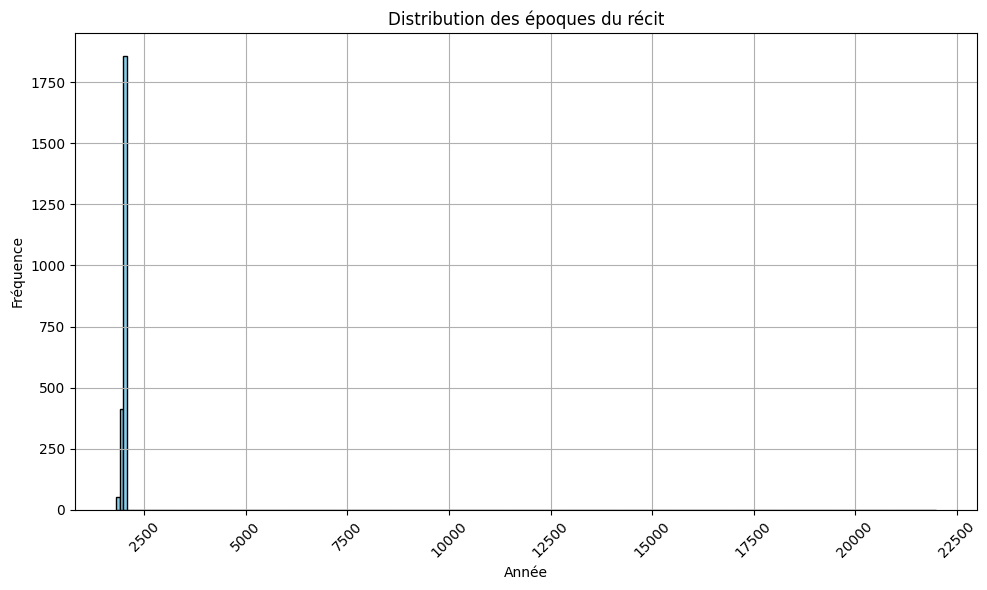

In [10]:
epoque = "EPOQUE DU RECIT"

# Convertir toutes les valeurs en chaînes pour gérer les intervalles potentiels comme des entrées uniques
df_truncated[epoque] = df_truncated[epoque].astype(str)
all_years = visualize_year_distribution(df_truncated[epoque], 'Distribution des époques du récit')




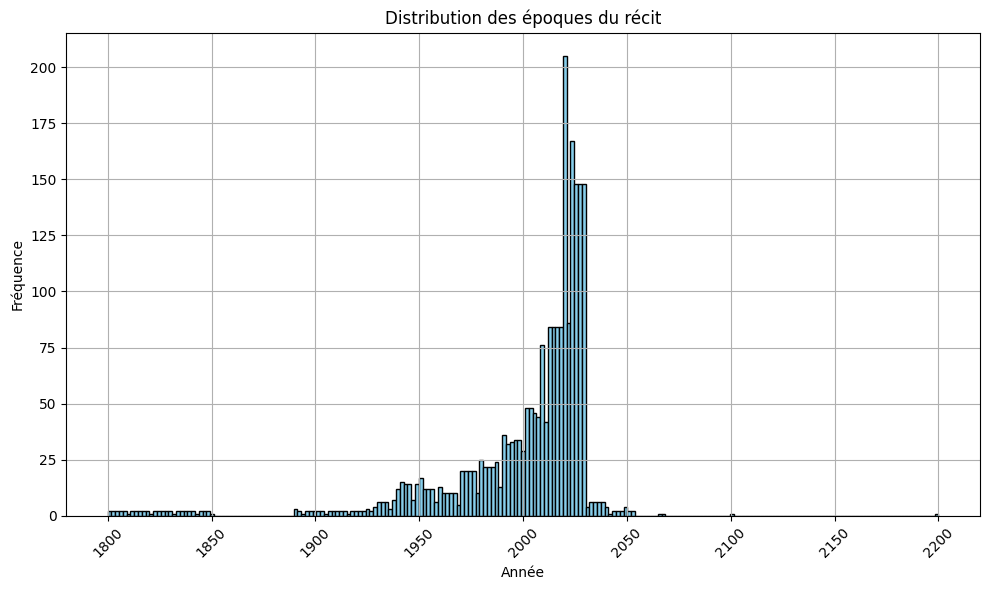

In [12]:
# keep years under 2500
before2500 = [x for x in all_years if x < 2500]
df = pd.DataFrame(before2500, columns=['Année']) 
all_years_before_2500 = visualize_year_distribution(df['Année'], 'Distribution des époques du récit')

In [13]:
# Future dates
# keep years after 2500
[x for x in all_years if x >= 2500]

[22000]

In [15]:
import matplotlib.pyplot as plt

co2 = data["EMPREINTE PERSO"]
c = co2.value_counts()
c.index


Index(['Entre 2 et 10 tonnes', 'Entre 10 et 30 tonnes', 'Entre 0 et 2 tonnes',
       'Entre 30 et 80 tonnes', 'Au-delà de 80 tonnes'],
      dtype='object', name='EMPREINTE PERSO')

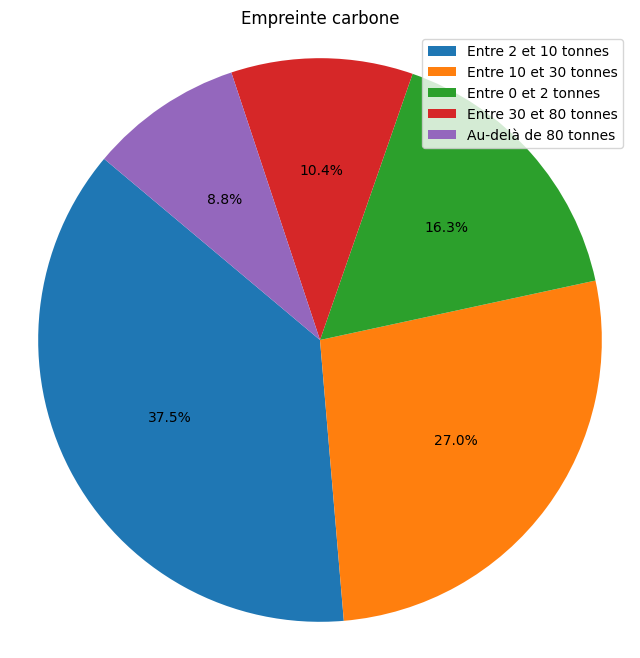

In [16]:
# Construction du camembert
plt.figure(figsize=(8, 8))
plt.pie(c, autopct='%1.1f%%', startangle=140)
plt.title("Empreinte Personnelle")

plt.axis('equal')  # S'assure que le camembert est dessiné comme un cercle.
plt.title('Empreinte carbone')
plt.legend(c.index)
plt.show()


In [17]:

col_qqch_ajouter = df_truncated["QUELQUE CHOSE A AJOUTER ?"]

# Analyzing the "QUELQUE CHOSE A AJOUTER ?" column to understand its content
# Check if the column exists
if "QUELQUE CHOSE A AJOUTER ?" in df_truncated.columns:
    # Basic analysis of the column
    # Count of non-empty entries
    non_empty_count = col_qqch_ajouter.notna().sum()
    # Unique non-empty entries
    unique_non_empty_entries = col_qqch_ajouter.nunique()
    # Sample of non-empty entries
    sample_entries = col_qqch_ajouter.dropna().sample(min(5, non_empty_count)).tolist()
    analysis_results = {
        "Non-empty count": non_empty_count,
        "Unique non-empty entries": unique_non_empty_entries,
        "Sample entries": sample_entries
    }
else:
    analysis_results = "Column 'QUELQUE CHOSE A AJOUTER ?' does not exist in the dataset."

analysis_results


{'Non-empty count': 54,
 'Unique non-empty entries': 54,
 'Sample entries': ['Très compliqué pour cette série. ',
  'Le film me semble représenter une vie bas carbone souhaitable',
  'Approche très intéressante, je laisse mon mail pour en savoir plus :) ',
  "La série met en marge des personnages plutôt en marge de la société de consommation, mais montre pourtant bien l'emprise du  système du Tout voiture",
  "C'est une série israélienne qui traite du problème palestinien... Il y a donc forcément un biais. Les méchants sont palestiniens. "]}